In [1]:
import pymc3 as pm
import arviz as az
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
n= 50 # number of data points
θ = 1.5
θ_1 = 2.5
ϵ = np.random.normal(0,0.7,n) #adding noise to the data
x = np.random.uniform(0,10,n) #  normal distribution

### Generate data

In [3]:
y = θ + θ_1*x + x**2 + ϵ

C:\Users\Mfund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

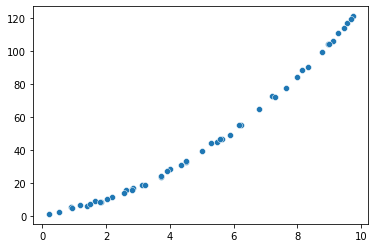

In [4]:
sns.scatterplot(x,y)

In [ ]:
with pm.Model() as Reg_model:
    #adding priors
    theta = pm.Normal("θ", mu =0, sd = 10, shape=[10])
    ϵ = pm.HalfNormal("ϵ", 5)
    
    μ_0 = theta[0]+ theta[1]*x + theta[2]*x**2
    
    #likelihood
    y_obs = pm.Normal('y_obs', mu = μ_0, sd= ϵ, observed=y)
    trace_Reg = pm.sample(2000,tune=1000)

<ipython-input-7-e366b1d20cc6>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_Reg = pm.sample(2000,tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Mfund\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Mfund\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, θ]


In [ ]:
az.plot_trace(trace_Reg)